<a href="https://colab.research.google.com/github/Rafi-Sharkar/Numerical-Method/blob/main/2131130_Lab_Assignment_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/mirsazzathossain/CSE317-Lab/blob/autumn_2022/Lab_Assignment_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Polynomial Regression**

In this assignment, you will implement polynomial regression and apply it to the [Assignment 4 Dataset](https://minhaskamal.github.io/DownGit/#/home?url=https://github.com/mirsazzathossain/CSE317-Lab-Numerical-Methods/blob/main/datasets/data.csv).

The dataset contains two columns, the first column is the feature and the second column is the label. The goal is find the best fit line for the data.

You will need to perform the following regression tasks and find the best one for the dataset.

1.    **Linear Regression:**

     The equation we are trying to fit is:
     $$y = \theta_0 + \theta_1 x$$
     where $x$ is the feature and $y$ is the label.

     We can rewrite the equation in vector form as:
$$Y = X\theta$$ where $X$ is a matrix with two columns, the first column is all 1s and the second column is the feature, and $Y$ is a vector with the labels. $\theta$ is a vector with two elements, $\theta_0$ and $\theta_1$. The $X$ matrix will look like this:
$$X = \begin{bmatrix} 1 & x_1 \\ 1 & x_2 \\ \vdots & \vdots \\ 1 & x_n \end{bmatrix}$$
2. **Quadratic Regression:**

     The equation we are trying to fit is:
     $$y = \theta_0 + \theta_1 x + \theta_2 x^2$$
     where $x$ is the feature and $y$ is the label.

     We can rewrite the equation in vector form as:
$$Y = X\theta$$where $X$ is a matrix with three columns, the first column is all 1s, the second column is the feature, and the third column is the feature squared, and $Y$ is a vector with the labels. $\theta$ is a vector with three elements, $\theta_0$, $\theta_1$, and $\theta_2$. The $X$ matrix will look like this:

$$X = \begin{bmatrix} 1 & x_1 & x_1^2 \\ 1 & x_2 & x_2^2 \\ \vdots & \vdots & \vdots \\ 1 & x_n & x_n^2 \end{bmatrix}$$
3. **Cubic Regression:**

     The equation we are trying to fit is:
$$y = \theta_0 + \theta_1 x + \theta_2 x^2 + \theta_3 x^3$$
     where $x$ is the feature and $y$ is the label.

     We can rewrite the equation in vector form as:
$$Y = X\theta$$where $X$ is a matrix with four columns, the first column is all 1s, the second column is the feature, the third column is the feature squared, and the fourth column is the feature cubed, and $Y$ is a vector with the labels. $\theta$ is a vector with four elements, $\theta_0$, $\theta_1$, $\theta_2$, and $\theta_3$. The $X$ matrix will look like this:
$$X = \begin{bmatrix} 1 & x_1 & x_1^2 & x_1^3 \\ 1 & x_2 & x_2^2 & x_2^3 \\ \vdots & \vdots & \vdots & \vdots \\ 1 & x_n & x_n^2 & x_n^3 \end{bmatrix}$$

Take 15 data points from the dataset and use them as the training set. Use the remaining data points as the test set. For each regression task, find the best $\theta$ vector using the training set. Then, calculate the mean squared error (MSE) on the test set. Plot the training set, the test set (in a different color), and the best fit line for each regression task. Which regression task gives the best fit line? Which regression task gives the lowest MSE on the test set? Report your answers in a Markdown cell.

**Note:** Do not use any built-in functions like `np.polyfit` or `sklearn.linear_model.LinearRegression` or any other built-in functions that perform polynomial regression. You must implement the regression tasks yourself.

In [ ]:
# importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# reading and separation of the dataset.
from google.colab import drive
file_path = '/content/sample_data/data.csv'
df = pd.read_csv(file_path)
df = df.to_numpy()
X = df[:, 0]
Y = df[:, 1]

training_set = df[:15]
test_set = df[15:]

#training_array = training_set.to_numpy()
#testing_array = test_set.to_numpy()

train_x = training_set[:, 0]
train_y = training_set[:, 1]

test_x = test_set[:, 0]
test_y = test_set[:, 1]

print('training set:', training_set)
print('testing set:', test_set)

print(X)

training set: [[  -3.292157  -53.468412]
 [   0.799528   -1.26256 ]
 [  -0.936214   -3.506193]
 [  -4.72268  -107.2232  ]
 [  -3.602674  -49.13195 ]
 [   4.931834    8.901224]
 [  -0.850265   -5.466242]
 [   2.454072   -5.762632]
 [   2.309657   -0.600586]
 [   0.768204    1.222678]
 [   1.567869   -3.956637]
 [  -2.362821  -21.989895]
 [  -0.283113   -6.118123]
 [   1.634975  -10.46844 ]
 [   0.66841    -4.119557]]
testing set: [[  0.998977  -3.029419]
 [ -2.482237 -21.761523]
 [  2.615475  -1.512952]
 [  1.060797  -4.754912]
 [  4.562287   6.507233]]
[-3.292157  0.799528 -0.936214 -4.72268  -3.602674  4.931834 -0.850265
  2.454072  2.309657  0.768204  1.567869 -2.362821 -0.283113  1.634975
  0.66841   0.998977 -2.482237  2.615475  1.060797  4.562287]


In [ ]:
# finding the best  θ  vector using training_set

# for linear regression
linear_matrix = np.vstack([np.ones(train_x.size), train_x]).T
print('linear regression matrix:')
print(linear_matrix)

avg_a = np.dot(np.ones(train_x.size), train_x)/train_x.size
avg_b = np.dot(np.ones(train_y.size), train_y)/train_y.size

a_tilde = train_x - avg_a
b_tilde = train_y - avg_b

std_a = np.sqrt(np.dot((train_x - avg_a), (train_x - avg_a))/(train_x.size-1))
std_b = np.sqrt(np.dot((train_x - avg_b), (train_y - avg_b))/(train_y.size-1))

rho = np.dot(a_tilde, b_tilde)/(np.sqrt(np.dot(a_tilde, a_tilde))*np.sqrt(np.dot(b_tilde, b_tilde)))

l_2 = (rho*std_b)/std_a
l_1 = avg_b - avg_a*l_2

print('linear theta', l_1, l_2)


# for quadratic regression
quadratic_matrix = np.vstack([np.ones(train_x.size), train_x, train_x**2]).T
print('quadratic regression matrix:')
print(quadratic_matrix)

Q_T = quadratic_matrix.T                        # Transpose of X
Q_T_Q = Q_T @ quadratic_matrix                  # X^T * X
Q_T_Q_inv = np.linalg.inv(Q_T_Q)                # Inverse of (X^T * X)
Q_T_y = Q_T @ train_y                           # X^T * y
quadratic_theta = Q_T_Q_inv @ Q_T_y             # Compute theta
q1, q2, q3 = quadratic_theta
print('quadratic theta', q1, q2, q3)

# for cubic regression
cubic_matrix = np.vstack([np.ones(train_x.size), train_x, train_x**2, train_x**3]).T
print('cubic regression matrix:')
print(cubic_matrix)

C_T = cubic_matrix.T                        # Transpose of X
C_T_C = C_T @ cubic_matrix                  # X^T * X
C_T_C_inv = np.linalg.inv(C_T_C)            # Inverse of (X^T * X)
C_T_y = C_T @ train_y                       # X^T * y
cubic_theta = C_T_C_inv @ C_T_y             # Compute theta
c1,c2,c3,c4 = cubic_theta
print('cubic theta', c1, c2, c3, c4)

linear regression matrix:
[[ 1.       -3.292157]
 [ 1.        0.799528]
 [ 1.       -0.936214]
 [ 1.       -4.72268 ]
 [ 1.       -3.602674]
 [ 1.        4.931834]
 [ 1.       -0.850265]
 [ 1.        2.454072]
 [ 1.        2.309657]
 [ 1.        0.768204]
 [ 1.        1.567869]
 [ 1.       -2.362821]
 [ 1.       -0.283113]
 [ 1.        1.634975]
 [ 1.        0.66841 ]]
linear theta -17.37728624479173 2.5030521132039136
quadratic regression matrix:
[[ 1.         -3.292157   10.83829771]
 [ 1.          0.799528    0.63924502]
 [ 1.         -0.936214    0.87649665]
 [ 1.         -4.72268    22.30370638]
 [ 1.         -3.602674   12.97925995]
 [ 1.          4.931834   24.3229866 ]
 [ 1.         -0.850265    0.72295057]
 [ 1.          2.454072    6.02246938]
 [ 1.          2.309657    5.33451546]
 [ 1.          0.768204    0.59013739]
 [ 1.          1.567869    2.4582132 ]
 [ 1.         -2.362821    5.58292308]
 [ 1.         -0.283113    0.08015297]
 [ 1.          1.634975    2.67314325]
 [

In [ ]:
# calculate the mean squared error (MSE) on the test set

#linear MSE
linear_y_pred = l_1 + l_2*test_x
mse_linear = np.mean((test_y - linear_y_pred)**2)
print('linear MSE:', mse_linear)

#quadratic MSE
quadratic_y_pred = q1 + q2*test_x + q3*test_x**2   #y=θ0+θ1x+θ2x2+θ3x3
mse_quadratic = np.mean((test_y - quadratic_y_pred)**2)
print('quadratic MSE:', mse_quadratic)

# cubic MSE
cubic_y_pred = c1 + c2*test_x + c3*test_x**2 + c4*test_x**3
mse_cubic = np.mean((test_y - cubic_y_pred)**2)
print('cubic MSE:', mse_cubic)

linear MSE: 97.04825787711178
quadratic MSE: 93.64964381498449
cubic MSE: 7.64199934562704


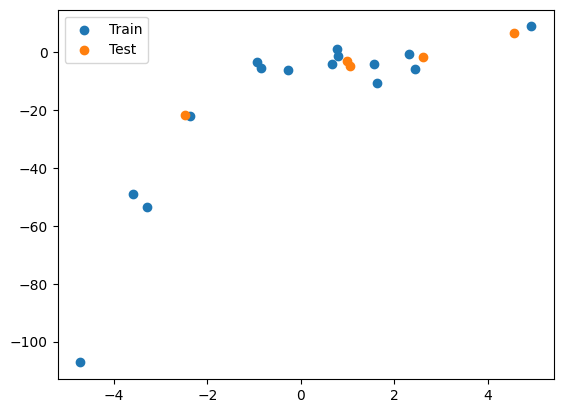

In [ ]:
# Plot the training set, the test set (in a different color)

plt.scatter(train_x, train_y, label='Train')
plt.scatter(test_x, test_y, label='Test')
plt.legend()
plt.show()

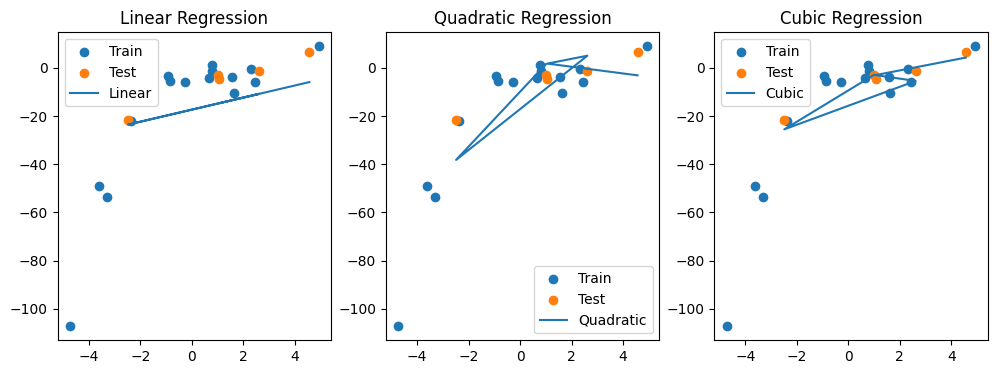

In [ ]:
# the best fit line for each regression task

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.scatter(train_x, train_y, label="Train")
plt.scatter(test_x, test_y, label="Test")
plt.plot(test_x, linear_y_pred, label="Linear")
plt.legend()
plt.title("Linear Regression")

plt.subplot(1, 3, 2)
plt.scatter(train_x, train_y, label="Train")
plt.scatter(test_x, test_y, label="Test")
plt.plot(test_x, quadratic_y_pred, label="Quadratic")
plt.legend()
plt.title("Quadratic Regression")

plt.subplot(1, 3, 3)
plt.scatter(train_x, train_y, label="Train")
plt.scatter(test_x, test_y, label="Test")
plt.plot(test_x, cubic_y_pred, label="Cubic")
plt.legend()
plt.title("Cubic Regression")

plt.show()

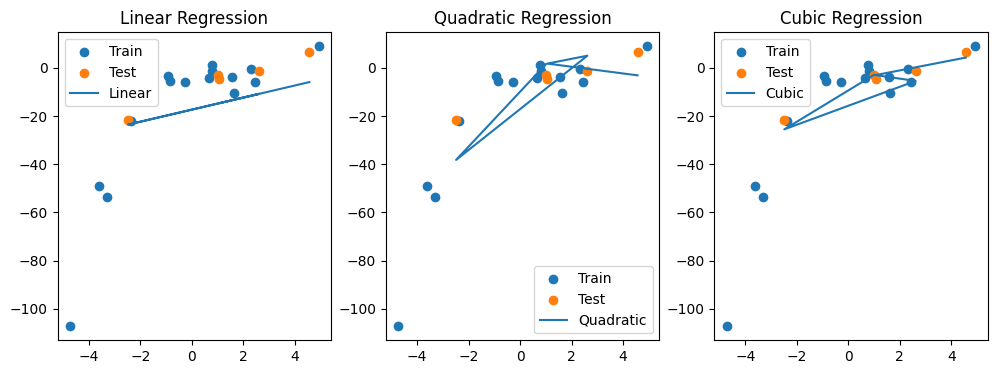

In [ ]:
# the best fit line for each regression task

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.scatter(train_x, train_y, label="Train")
plt.scatter(test_x, test_y, label="Test")
plt.plot(test_x, linear_y_pred, label="Linear")
plt.legend()
plt.title("Linear Regression")

plt.subplot(1, 3, 2)
plt.scatter(train_x, train_y, label="Train")
plt.scatter(test_x, test_y, label="Test")
plt.plot(test_x, quadratic_y_pred, label="Quadratic")
plt.legend()
plt.title("Quadratic Regression")

plt.subplot(1, 3, 3)
plt.scatter(train_x, train_y, label="Train")
plt.scatter(test_x, test_y, label="Test")
plt.plot(test_x, cubic_y_pred, label="Cubic")
plt.legend()
plt.title("Cubic Regression")

plt.show()

In [ ]:
def create_design_matrix(X, degree):
    return np.vstack([X**i for i in range(degree + 1)]).T

    if degree == 1:
        return np.vstack((np.ones(len(X)), X)).T
    elif degree == 2:
        return np.vstack((np.ones(len(X)), X, X**2)).T
    elif degree == 3:
        return np.vstack((np.ones(len(X)), X, X**2, X**3)).T
    else:
        raise ValueError("Invalid degree")

MSE Results:
Degree 1: MSE = 170.1102
Degree 2: MSE = 93.6496
Degree 3: MSE = 7.6420

Best Model: Degree 3


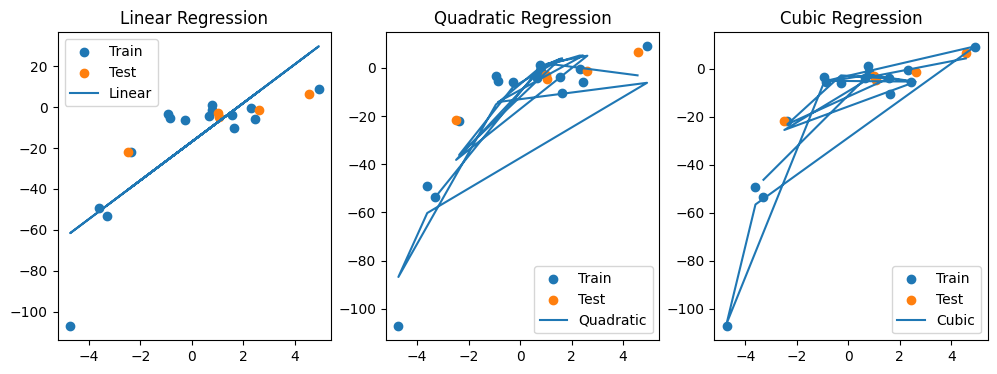

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def load_data():
    data = pd.read_csv('/content/sample_data/data.csv')
    data = data.to_numpy()
    X = data[:, 0]
    y = data[:, 1]
    return X, y

def split_data(X, y, train_size=15):
    """Splits data into training and test sets."""
    X_train = X[:train_size]
    y_train = y[:train_size]
    X_test = X[train_size:]
    y_test = y[train_size:]
    return X_train, y_train, X_test, y_test

def create_polynomial_features(X, degree):
    """Creates polynomial features for the given degree."""
    if degree == 1:
        return np.vstack((np.ones(len(X)), X)).T
    elif degree == 2:
        return np.vstack((np.ones(len(X)), X, X**2)).T
    elif degree == 3:
        return np.vstack((np.ones(len(X)), X, X**2, X**3)).T
    else:
        raise ValueError("Invalid degree")

def fit(X_train, y_train):
    """Calculates the optimal theta using the training data."""
    theta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
    return theta

def predict(X, theta):
    """Predicts the labels for new data points."""
    return X @ theta

def mean_squared_error(y_true, y_pred):
    """Calculates the mean squared error."""
    return np.mean((y_true - y_pred)**2)

# Load data
X, y = load_data()

# Split data into training and test sets
X_train, y_train, X_test, y_test = split_data(X, y)

# Define degrees for polynomial regression
degrees = [1, 2, 3]  # Linear, Quadratic, Cubic

# Store results
mse_results = {}
best_fit_lines = {}

# Perform polynomial regression for each degree
for degree in degrees:
    # Create polynomial features
    X_train_poly = create_polynomial_features(X_train, degree)
    X_test_poly = create_polynomial_features(X_test, degree)

    # Fit the model
    theta = fit(X_train_poly, y_train)

    # Predict on test data
    y_pred_test = predict(X_test_poly, theta)

    # Calculate MSE
    mse = mean_squared_error(y_test, y_pred_test)
    mse_results[degree] = mse

    # Store best fit line
    best_fit_lines[degree] = theta

# Find the best model
best_degree = min(mse_results, key=mse_results.get)

# Print results
print("MSE Results:")
for degree, mse in mse_results.items():
    print(f"Degree {degree}: MSE = {mse:.4f}")

print(f"\nBest Model: Degree {best_degree}")

# Plot results
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.scatter(X_train, y_train, label="Train")
plt.scatter(X_test, y_test, label="Test")
plt.plot(X, predict(create_polynomial_features(X, 1), best_fit_lines[1]), label="Linear")
plt.legend()
plt.title("Linear Regression")

plt.subplot(1, 3, 2)
plt.scatter(X_train, y_train, label="Train")
plt.scatter(X_test, y_test, label="Test")
plt.plot(X, predict(create_polynomial_features(X, 2), best_fit_lines[2]), label="Quadratic")
plt.legend()
plt.title("Quadratic Regression")

plt.subplot(1, 3, 3)
plt.scatter(X_train, y_train, label="Train")
plt.scatter(X_test, y_test, label="Test")
plt.plot(X, predict(create_polynomial_features(X, 3), best_fit_lines[3]), label="Cubic")
plt.legend()
plt.title("Cubic Regression")

plt.show()